In [1]:
%matplotlib inline
from sklearn.externals import joblib
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from keras import models
from keras import layers
import librosa
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 5)
plt.rcParams['figure.figsize'] = (14, 5)
from IPython.display import Audio
from song import drum

Using TensorFlow backend.


In [2]:
scaler = joblib.load(os.path.abspath("scaler.save"))
model = load_model('drum_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [19]:
y, sr = librosa.load("../Songs/drumbeat2.wav")
# y = y[:sr*5]

In [20]:
Audio(y, rate=sr)

In [21]:
onset_env = librosa.onset.onset_strength(y)
onset_frames = librosa.onset.onset_detect(y, onset_envelope=onset_env)
onset_samples = onset_frames * 512

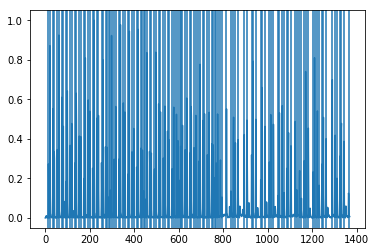

In [22]:
plt.plot(onset_env)
for on in onset_frames:
    plt.axvline(x=on)
plt.show()

In [23]:
from scipy.signal import get_window
window = get_window("hamming", 5000)

In [24]:
segments = []
for ons in onset_samples[:-1]:
    segment = y[ons-2500:ons + 2500]
    windowed = segment * window
    segments.append(windowed)

In [25]:
Audio(segment, rate=sr)


In [26]:
Audio(windowed, rate=sr)

In [27]:
for i in range(len(segments)):
    segments[i] = drum.extract_feats(segments[i], sr)
trans = scaler.transform(np.array(segments))

c:\users\p\pycharmprojects\2019-ca400-ferryp2\project\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [28]:
predictions = (model.predict_proba(trans))

In [51]:
len(predictions)
classes = []
for prediction in predictions:
#     print(predict)
    highs =(np.argsort(prediction[prediction > .01]))
#     highest = (c[np.argmax(prediction)])
    classes.append([c[x] for x in highs] )
#     classes.append(c[np.argmax(prediction)])

In [52]:
classes

[['Clap'],
 ['Clap'],
 ['Clap', 'Crash', 'ClosedHat'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap', 'ClosedHat'],
 ['Clap', 'ClosedHat'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap', 'ClosedHat'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap', 'ClosedHat'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap', 'ClosedHat'],
 ['Clap', 'ClosedHat'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap', 'ClosedHat'],
 ['Clap', 'ClosedHat'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['ClosedHat', 'Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap', 'ClosedHat'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['ClosedHat', 'Clap'],
 ['ClosedHat', 'Clap'],
 ['Clap'],
 ['Clap'],
 ['ClosedHat', 'Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['ClosedHat', 'Clap'],
 ['ClosedHat', 'Clap'],
 ['Clap'],
 ['Clap'],
 ['Clap'],
 ['ClosedHat'

In [11]:
c = {0: "Clap",
     1: "ClosedHat",
     2: "Crash",
     3: "Kick",
     4: "OpenHat",
     5: "Ride",
     6: "Snare",
     7: "Tom"}

In [13]:
plt.plot(p[0])
plt.xticks(np.arange(0,8), labels=t)
plt.show()

NameError: name 'p' is not defined

In [313]:
t = tuple(list(c.values()))

c:\users\p\pycharmprojects\2019-ca400-ferryp2\project\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


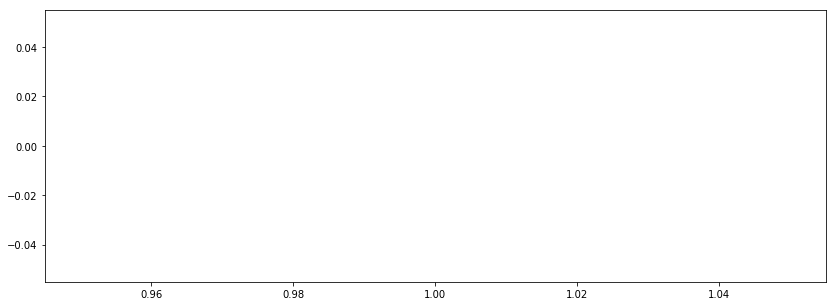

In [312]:
plt.plot(np.log10(p[0]))
plt.show()

In [30]:
from song import midi_tools

In [31]:
bpm = librosa.beat.tempo(y)[0]

In [32]:
bpm

129.19921875

In [33]:
newclasses = [[x] for x in classes]

In [53]:
midi_tools.out_midi_drums(onset_frames, newclasses, bpm, sr)

In [23]:
newclasses

[['Kick'],
 ['OpenHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Snare'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Snare'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Kick'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Snare'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Snare'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Kick'],
 ['ClosedHat'],
 ['Kick'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Snare'],
 ['ClosedHat'],
 ['Kick'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Kick'],
 ['Snare'],
 ['Kick'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Snare'],
 ['Kick'],
 ['Snare'],
 ['Snare'],
 ['ClosedHat'],
 ['Snare'],
 ['ClosedHat'],
 ['Snare'],
 ['Snare'],
 ['Snare'],
 ['Kick'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Kick'],
 ['Snare'],
 ['Kick'],
 ['Snare'],
 ['ClosedHat'],
 ['Kick'],
 ['ClosedHat'],
 ['Snare'],
 ['Snare'],
 ['Kick'],
 ['ClosedHat'],
 ['ClosedHat'],
 ['Kick'],
 ['S